# Тестовое задание на позицию аналитика в отделе бизнеса и рекламы Ломакина Алексея
## Подготовка

Импортируем все необходимые для работы библиотеки. 
Pandas - для работы с данными,
PyPlot - для построения графиков,
DateTime - для работы со временем,
Numpy - для различных числовых операций.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
%matplotlib inline

Выводим шапку имеющихся данных, чтобы представить, с чем будем работать.

In [72]:
df = pd.read_csv('test_data.csv')
df.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11


# Задание 1
## Воспроизведите график числа рекламных событий по дням. 

Для того, чтобы построить этот график, нужно сгруппирвоать данные по дням, а для каждого дня посчитать количество ивентов совершенных в этот день.

Text(0.5, 0.98, 'Действия с рекламным объявлением')

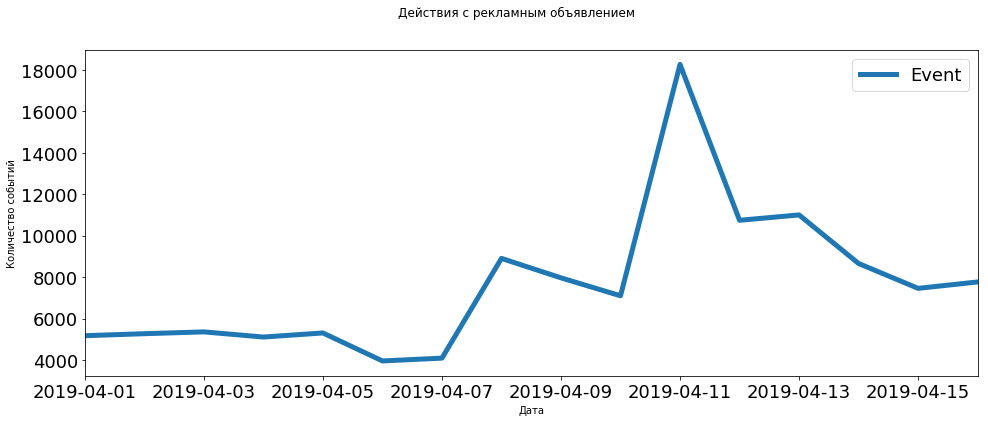

In [96]:
plt.figure(figsize=(16,6))
df.groupby('date')['event'].count().plot(label='Event', linewidth =5, fontsize = 18)
plt.legend(fontsize =18)
plt.ylabel('Количество событий')
plt.xlabel('Дата')
plt.suptitle('Действия с рекламным объявлением')

# Задание 2
## Найдите причину резкого увеличения количества рекламных событий и объясните, что произошло


Здесь мы высчитываем общее количество различных ивентов, количество ивентов без дубликатов и конечную разницу. Как мы видим, она составляет всего 1136, что на общем фоне предельно мало. Следавательно можно сделать вывод, что наш аномальный скачок не связан с ошибкой и дублированнием данных.

In [74]:
len(df), len(df.drop_duplicates()), len(df) - len(df.drop_duplicates())

(122097, 120961, 1136)

Сейчас мы выводим график с каждым из типов взаимодействия с рекламным объявлением: клики, показы и жалобы. Как видим, количество кликов и жалоб осталось неизменным, а количество просмотров резко возросло.

Text(0.5, 0.98, 'Действия с рекламным объявлением')

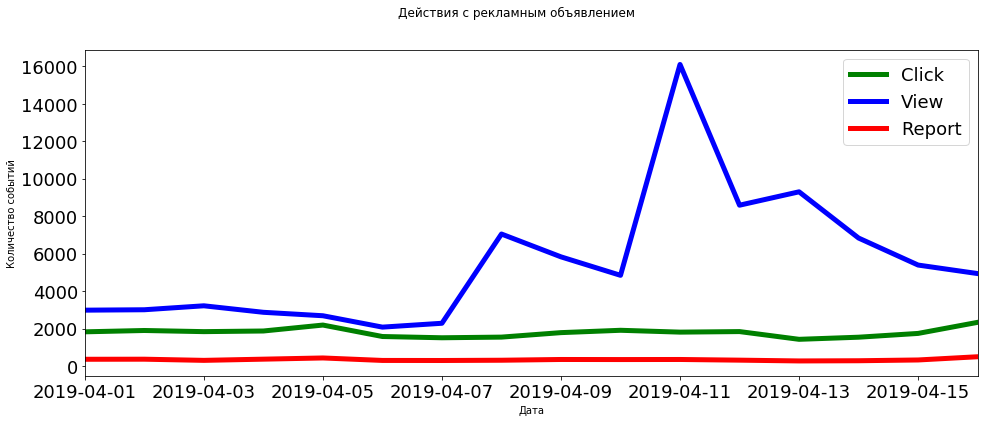

In [75]:
plt.figure(figsize=(16,6))
df[df.event == 'click'].groupby('date')['event'].count().plot(label='Click', linewidth =5, fontsize = 18, color = 'green')
df[df.event == 'view'].groupby('date')['event'].count().plot(label='View', linewidth =5, fontsize = 18, color = 'blue')
df[df.event == 'report'].groupby('date')['event'].count().plot(label='Report', linewidth =5, fontsize = 18, color = 'red')
plt.legend(fontsize =18)
plt.ylabel('Количество событий')
plt.xlabel('Дата')
plt.suptitle('Действия с рекламным объявлением')

Далее мы изучаем тип трат рекламного объявления. Видим, что скачок пришелся на Cost Per Click.

Text(0.5, 0.98, 'Типы рекламного объявления')

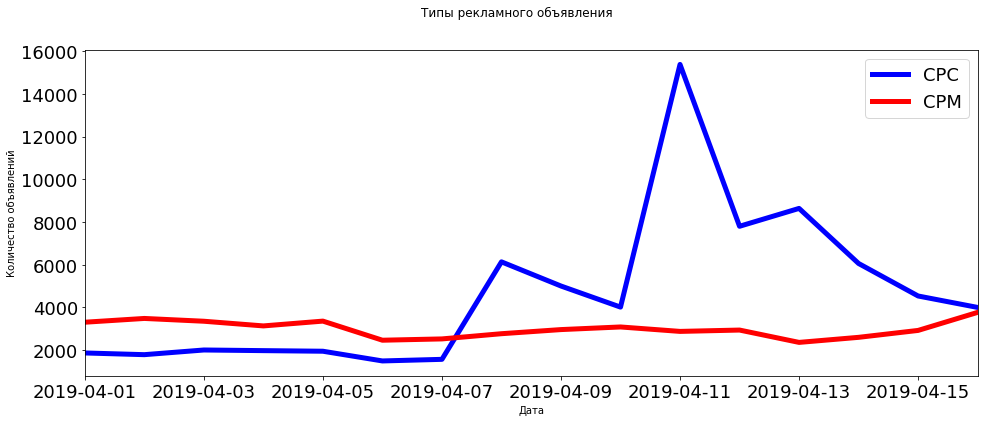

In [76]:
plt.figure(figsize=(16,6))
df[df.ad_cost_type == 'CPC'].groupby('date')['event'].count().plot(label='CPC', linewidth =5, fontsize = 18, color = 'blue')
df[df.ad_cost_type == 'CPM'].groupby('date')['event'].count().plot(label='CPM', linewidth =5, fontsize = 18, color = 'red')
plt.legend(fontsize =18)
plt.ylabel('Количество объявлений')
plt.xlabel('Дата')
plt.suptitle('Типы рекламного объявления')

Теперь узнаем, связан ли наш аномальный скачок с наличием видео в объявлении. На графике мы наблюдаем, что видео в объявлении не играет роли. В целом количество объявлений с видео составляет около 30-60 штук, поэтому их график колеблется в районе нуля.

Text(0.5, 0.98, 'Наличие видео')

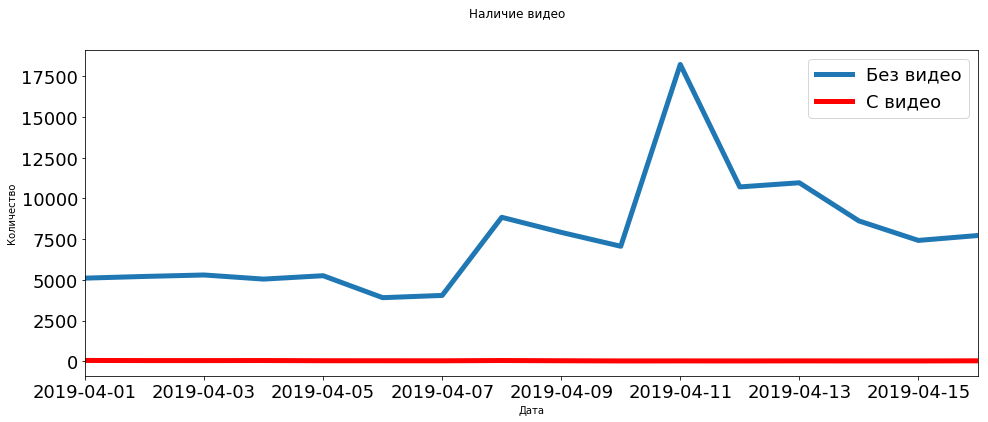

In [77]:
plt.figure(figsize=(16,6))
df[df.has_video == 0].groupby('date')['event'].count().plot(label='Без видео', linewidth =5, fontsize = 18)
df[df.has_video == 1].groupby('date')['event'].count().plot(label='С видео', linewidth =5, fontsize = 18, color = 'red')
plt.legend(fontsize =18)
plt.ylabel('Количество')
plt.xlabel('Дата')
plt.suptitle('Наличие видео')

Теперь узнаем, кем предоставлено аномальное объявление: агенство или физ. лицо. 
Так как количество рекламных агенств очень большое, то чтобы не перебирать айди кадого, выведем график по условию НЕ физ. лицо.
Так мы видим, что агенство причастно к нашему скачку. Найдем, какое именно.

Text(0.5, 0.98, 'Агентсво или физическое лицо')

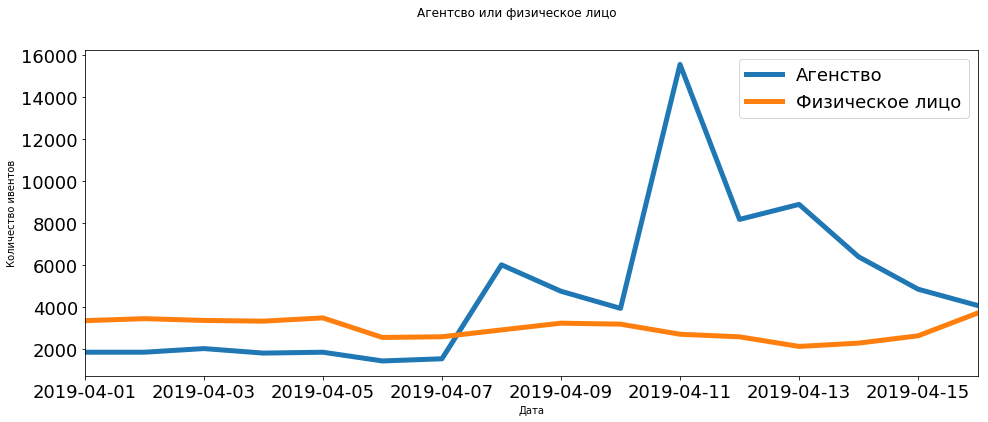

In [78]:
plt.figure(figsize=(16,6))
df[df.agency_union_id != 'no_agency'].groupby('date')['event'].count().plot(label='Агенство', linewidth =5, fontsize = 18)
df[df.agency_union_id == 'no_agency'].groupby('date')['event'].count().plot(label='Физическое лицо', linewidth =5, fontsize = 18)
plt.legend(fontsize =18)
plt.ylabel('Количество ивентов')
plt.xlabel('Дата')
plt.suptitle('Агентсво или физическое лицо')

Отсортировываем кампании по количеству событий в порядке убывания и замечаем, что кампания с id 49554 имеет огромный отрыв по ивентам от всех остальных . Изучим ее подробнее.

In [79]:
df.groupby('campaign_union_id')['event'].count().sort_values(ascending = False).head(10)

campaign_union_id
campaign_49554     47739
campaign_47269      1867
campaign_5822       1012
campaign_387         794
campaign_1181        698
campaign_5131        687
campaign_102754      663
campaign_24261       650
campaign_3021        616
campaign_99643       577
Name: event, dtype: int64

Text(0.5, 0.98, 'События рекламной кампании id49554')

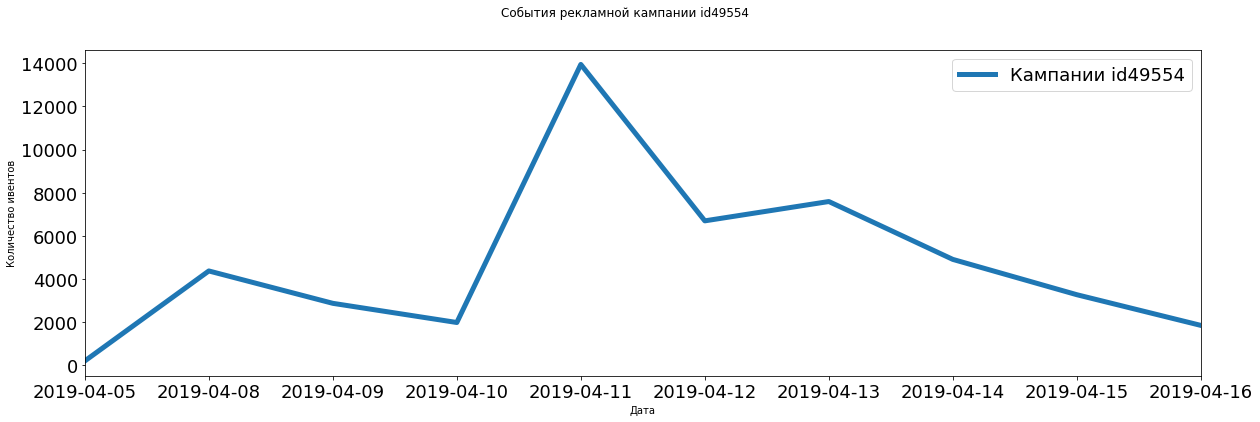

In [80]:
plt.figure(figsize=(20,6))
df[df.campaign_union_id == 'campaign_49554'].groupby('date')['event'].count().plot(label='Кампании id49554', linewidth =5, fontsize = 18)
plt.legend(fontsize =18)
plt.ylabel('Количество ивентов')
plt.xlabel('Дата')
plt.suptitle('События рекламной кампании id49554')

Узнаем, кто заказывал данную компанию, для этого используя известное нам айди кампании, найдем айди агенства и клиента.
Так мы имеем, что к аномальному объявлению причастно агенство с id 2 и клиент с id 47270.

In [81]:
df[df.campaign_union_id == 'campaign_49554'][['agency_union_id','client_union_id']].drop_duplicates()

,agency_union_id,client_union_id
10,agency_2,client_47270


Находим все id объявлений данной рекламной кампании и находим среди них аномальное. Выводим на графике отношение всех событий каждого объявления(исключением является id 50872, та как оно действовало только один день - 16 апреля) к дате. Так мы видим, что аномальный скачок принадлежит объявлению с id 49554.

Количество ивентов данного объявления составляет 10 000, что соотвествует скачку на общем графике событий.

In [82]:
df[df.campaign_union_id == 'campaign_49554']['ad_id'].drop_duplicates()

10      ad_49564
11      ad_49554
23      ad_49556
25      ad_49560
7068    ad_50872
Name: ad_id, dtype: object

Text(0.5, 0.98, 'События рекламного объявлений кампании id49554')

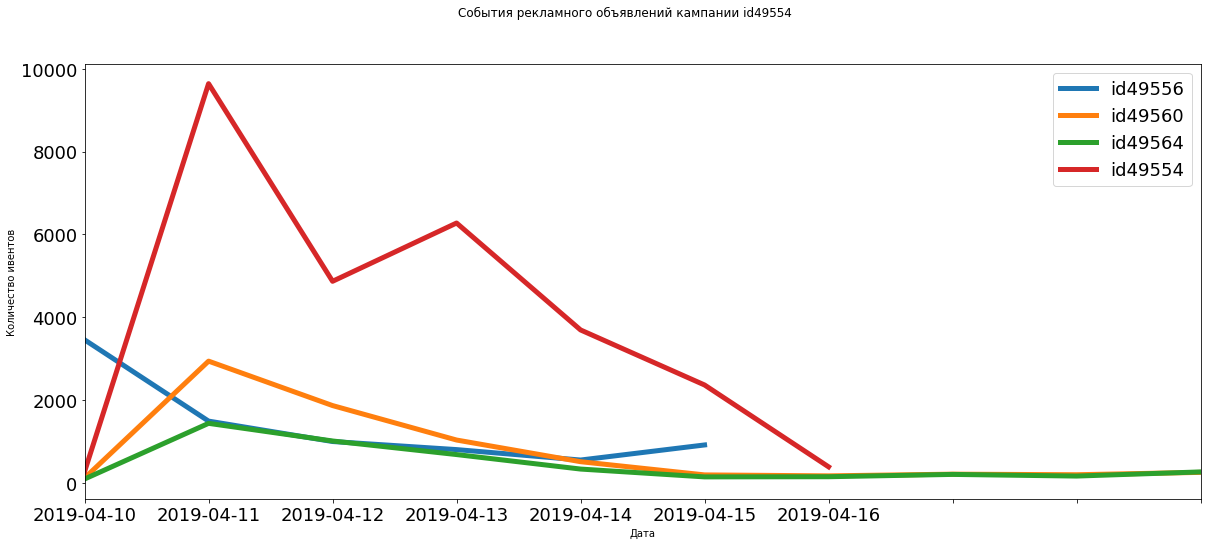

In [83]:
plt.figure(figsize=(20,8))
df[df.ad_id == 'ad_49556'].groupby('date')['event'].count().plot(label='id49556', linewidth =5, fontsize = 18)
df[df.ad_id == 'ad_49560'].groupby('date')['event'].count().plot(label='id49560', linewidth =5, fontsize = 18)
df[df.ad_id == 'ad_49564'].groupby('date')['event'].count().plot(label='id49564', linewidth =5, fontsize = 18)
df[df.ad_id == 'ad_49554'].groupby('date')['event'].count().plot(label='id49554', linewidth =5, fontsize = 18)
#16 df[df.ad_id == 'ad_50872'].groupby('date')['event'].count().plot(label='id50872', linewidth =5, fontsize = 18)
plt.legend(fontsize =18)
plt.ylabel('Количество ивентов')
plt.xlabel('Дата')
plt.suptitle('События рекламного объявлений кампании id49554')

Изучив новости за 11 апреля, можем найти информацию о прекращении майнинга криптовалюты VkCoin. Возможно объявление содержало информацию о возможности покупки/продаже койнов и клиент решил воспользоваться шумихой вокруг закрытия майнинга и заказал еще больше показов для этого. /n## Выводы

Аномалия в данных 11 апреля вызвана резким скачком в количестве показов объявления 49554, заказанное клиентом c id 47270 в агенство с id 2. В нем отсуствует видео, тип трат рекламного объявления - CPC. 
Я предполагаю, что это может быть связано с остановкой майнинга VkCoin, однкано предоставленных данных недостаточно для того чтобы с большей точночью расследовать случившеевся, поэтому предлагаю отправить эту информацию экспертам, чтобы они могли посмотреть уже более детально, что это за объявлние, клиент и агентсво. Возможно данный клиент действительно заказал такое большое количество показов его объявления

# Задание 3
## Предложите способ, который помог бы автоматически детектировать аномальные изменения метрик на графиках рекламной статистики.

Мы высчитываем среднее значение количества ивентов на последних точках проверки(будь то дни, часы, секунды).

lst - передоваемый в функцию массив данных.  
target - проверяемое на аномалию значение из нашего массива.  
N - количество используемых элементов перед нашим target для подсчета среднего значения. По умолчанию у нас N=3, чтобы не   учитывать слишком далекие значения и ориентироваться только на локальную ситуацию.  
lst_last_mean - массив последних N элементов  перед проверяемым значением.  
mean_last_n - среднее значение последних N элеменов.  
std_last_n - отклонение от нашего среднего значения.  


Так как в статистике принято считать аномалией значение, сильно отклоняющегося от среднего, а именно если это больше трех стандартных отклонений. Воспользуемся этим правилом: если модуль разницы между проверяемым значением и средним значением предыдущих элементов больше трех  стандартных отклонений - это является аномалией, иначе же все в норме.

In [84]:
def anomaly_detection(lst):
    n = 3
    lst_last_n = lst[-(n+1):-1]
    target = lst[-1]
    mean_last_n = np.mean(lst_last_n)
    std_last_n = np.std(lst_last_n)
    if (abs(target - mean_last_n) > 3*std_last_n):
        return 'Аномалия'
    else:
        return 'Все в норме'

Проверяем на аномалию собития, сгрупированные по дням. 

В первом примере нашей целью является последний 16-ый элемент и он в норме.
Во втором же случае нашей целью является 8 элемент и он уже отклоняется от нормы, а значит - аномальный.

In [85]:
events_by_day = df.groupby('date')['event'].count()
anomaly_detection(events_by_day[:])

'Все в норме'

In [86]:
anomaly_detection(events_by_day[:8])

'Аномалия'

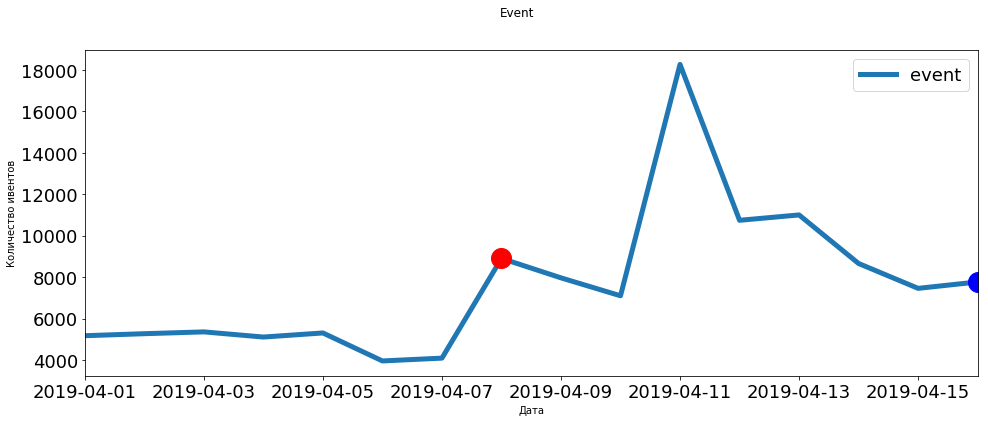

In [87]:
plt.figure(figsize=(16,6))
df.groupby('date')['event'].count().plot(linewidth =5, fontsize = 18)
plt.legend(fontsize =18)
plt.ylabel('Количество ивентов')
plt.xlabel('Дата')
plt.suptitle('Event')
plt.plot(15, events_by_day[15], marker='o', color='b', markersize=20)
plt.plot(7, events_by_day[7], marker='o', color='r', markersize=20)

Теперь мы проверим аномалию по часам. Для этого мы используем библиотеку datetime, чтобы высчитывать время.

Для начала мы преобразуем время в читаемый формат для дальшеней работы с ним.
Так как мы работаем только по часам, то обнуляем значения минут и секунд.

In [88]:
df['time'] = df.time.apply(lambda x: dt.datetime.utcfromtimestamp(x) )
df['hour'] = df.time.apply(lambda x: x.replace(second=0, minute=0) )

Проверяем на аномалию собития, сгрупированные по часам.

В первом примере нашей целью является последний 384-ый элемент и он в норме. Во втором же случае нашей целью является 12 элемент и он уже отклоняется от нормы, а значит - аномальный.

In [89]:
events_by_hour = df.groupby('hour')['event'].count()
anomaly_detection(events_by_hour[:])

'Все в норме'

In [90]:
anomaly_detection(events_by_hour[:12])

'Аномалия'

Выводим график ивентов, сгрупированный по часам, от 11 апреля, когда произошел скачок и видим, что примерно в 9 утра началась аномальная активность.

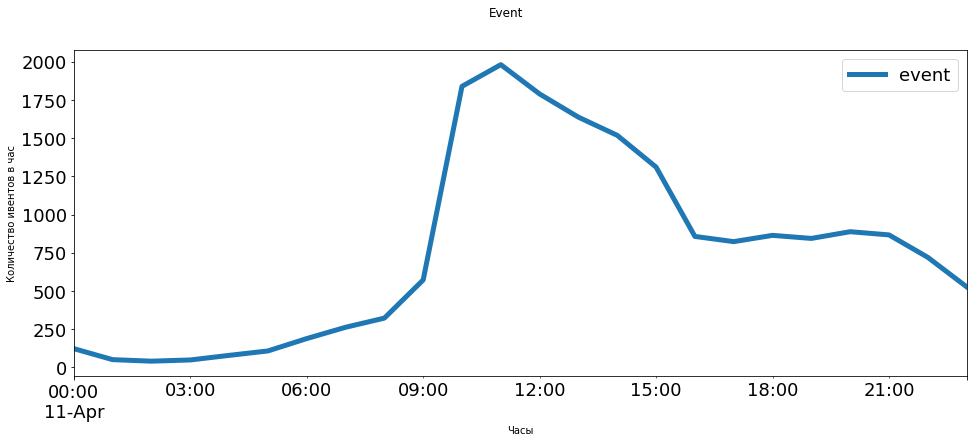

In [91]:
plt.figure(figsize=(16,6))
df[df.date == '2019-04-11'].groupby('hour')['event'].count().plot(linewidth =5, fontsize = 18)
plt.legend(fontsize =18)
plt.ylabel('Количество ивентов в час')
plt.xlabel('Часы')
plt.suptitle('Event')
plt.plot(383, events_by_hour[383], marker='o', color='b', markersize=20)
plt.plot(11, events_by_hour[11], marker='o', color='r', markersize=20)

Теперь займемся проверкой на аномалии каждые 5 минут.

Алгоритм вычесления каждых пяти минут схож с алгоритмом вычесления каждого часа. Тут мы обнуляем только секунды за ненадобность, а минуты округляем чисел, кратных пяти.

In [92]:
df['minute'] = df.time.apply(lambda x: x.replace(second = 0, minute = x.minute // 5 * 5))

Далее выводим график ивентов, сгрупированного по минутам и видим, что аномамалия началась примерно в 9:45.

Далее на протяжении часа она держалась на уровне ~180 событий в минуту с редкими просадками и в 11:00 активность пошла на спад и примерно в 11:40 нормализовалась.

Text(0.5, 0.98, 'Event')

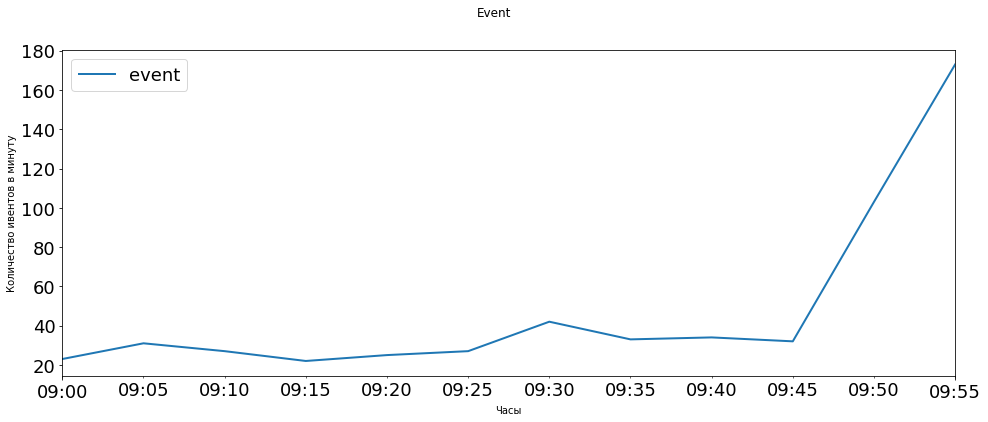

In [93]:
plt.figure(figsize=(16,6))
df[df.hour == '2019-04-11 09:00:00'].groupby('minute')['event'].count().plot(linewidth =2, fontsize = 18)
plt.legend(fontsize =18)
plt.ylabel('Количество ивентов в минуту')
plt.xlabel('Часы')
plt.suptitle('Event')

Text(0.5, 0.98, 'Event')

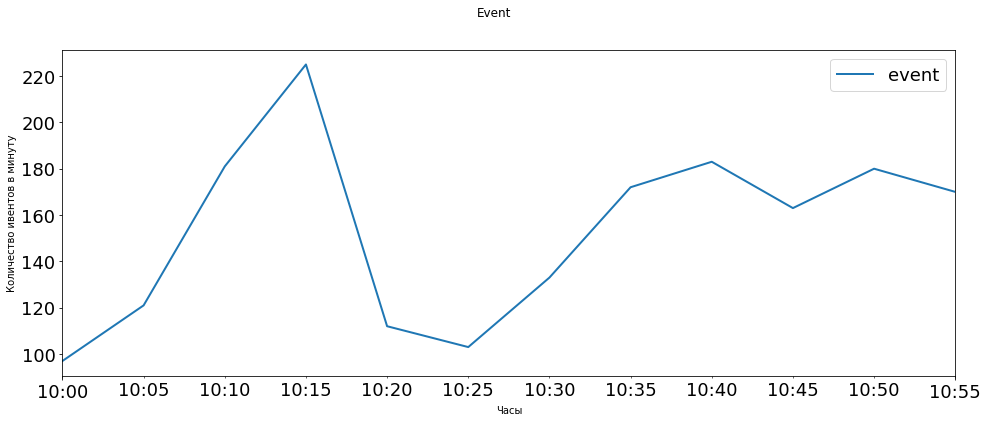

In [94]:
plt.figure(figsize=(16,6))
df[df.hour == '2019-04-11 10:00:00'].groupby('minute')['event'].count().plot(linewidth =2, fontsize = 18)
plt.legend(fontsize =18)
plt.ylabel('Количество ивентов в минуту')
plt.xlabel('Часы')
plt.suptitle('Event')

Text(0.5, 0.98, 'Event')

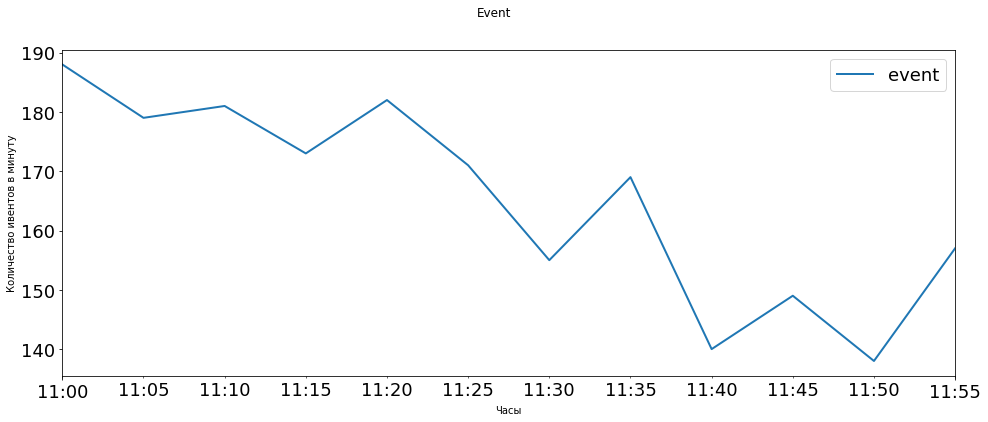

In [95]:
plt.figure(figsize=(16,6))
df[df.hour == '2019-04-11 11:00:00'].groupby('minute')['event'].count().plot(linewidth =2, fontsize = 18)
plt.legend(fontsize =18)
plt.ylabel('Количество ивентов в минуту')
plt.xlabel('Часы')
plt.suptitle('Event')

Проверяем на аномалию собития, сгрупированные по минутам.

В примере проверяем последний элемент и видим, что он в норме.

In [29]:
events_by_minute = df.groupby('minute')['event'].count()
anomaly_detection(events_by_minute[:])

'Все в норме'